<a href="https://colab.research.google.com/github/pankaj-beldar/Capstone_Project_04_Netflix_Movies_and_TV_Shows_Clustering/blob/main/Capstone_Project_04_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <font color='blue'>**Capstone_Project_04_Project_Netflix_Movies_and_TV_Shows_Clustering**</font>

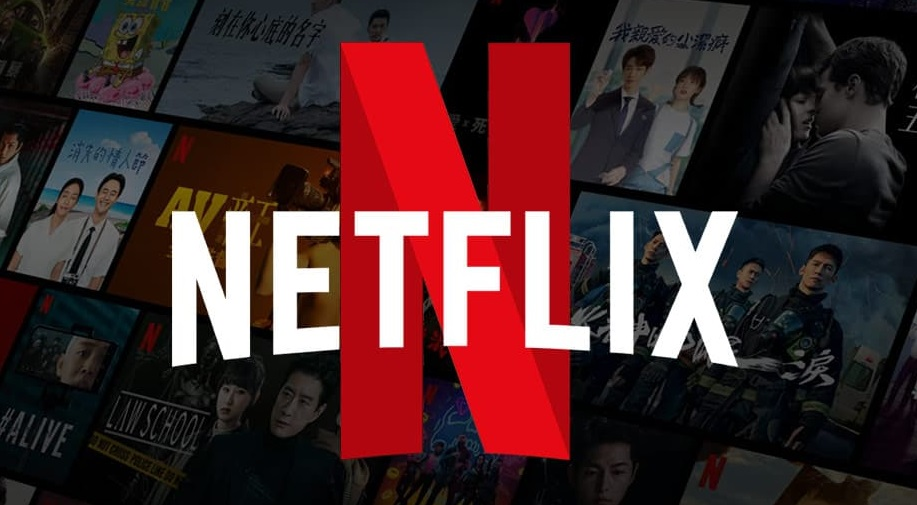

# <font color='green'>**Problem Statment**</font>


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, you are required to do**
* Exploratory Data Analysis

* Understanding what type content is available in different countries

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

 
# <font color='green'>**Attribute Information**</font>
1. **show_id** : Unique ID for every Movie / Tv Show

2. **type** : Identifier - A Movie or TV Show

3. **title** : Title of the Movie / Tv Show

4. **director**: Director of the Movie

5. **cast** : Actors involved in the movie / show

6. **country** : Country where the movie / show was produced

7. **date_added** : Date it was added on Netflix

8. **release_year** : Actual Releaseyear of the movie / show

9. **rating** : TV Rating of the movie / show

10. **duration** : Total Duration - in minutes or number of seasons

11. **listed_in** : Genere

12. **description**: The Summary description

# <font color='red'>**Milestones**</font>
1. Importing Libraries
2. Import Data
3. Data Overview
4. Data Cleaning
5. Data Visualization with EDA
6. Text Processing
7. Model Selection
8. Hyperparameter Tuning
9. Conclusion

# <font color='green'>**1. Let's Invite Usefull Libraries**</font>
**Import Required Libraries for EDA**




In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

**sklearn**

In [2]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

**Natural Language Processing**

In [3]:
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**libraries for clustering**

In [4]:
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# <font color='green'>**2. Let's Imports Data**</font>

**Mounting google drive**

In [5]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Loading our dataset**

In [6]:
# Loading our dataset from gogle drive and creating a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Almabetter_Capstone_04/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [7]:
# Exploring first 5 rows for better understanding of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# exploring Sample 5 rows of dataset
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5312,s5313,TV Show,Russell Peters vs. the World,NaN,Russell Peters,United States,"October 14, 2013",2013,NR,1 Season,"Docuseries, Stand-Up Comedy & Talk Shows","A four-part docu-series that's an exclusive, b..."
3189,s3190,Movie,Jo Koy: In His Elements,Michael McKay,"Jo Koy, Andrew Lopez, Joey Guila, Andrew Orolfo",United States,"June 12, 2020",2020,TV-MA,55 min,Stand-Up Comedy,"Jo Koy brings the laughs and beats to Manila, ..."
2670,s2671,Movie,Head On,Ana Kokkinos,"Alex Dimitriades, Paul Capsis, Julian Garner, ...",Australia,"August 25, 2018",1998,TV-MA,104 min,"Dramas, Independent Movies, LGBTQ Movies","This edgy drama follows 19-year-old Ari, a gay..."
5537,s5538,Movie,Shakti: The Power,Krishna Vamshi,"Karisma Kapoor, Nana Patekar, Sanjay Kapoor, S...",India,"March 1, 2018",2002,TV-MA,168 min,"Dramas, International Movies, Thrillers",A young mother must break free of the clutches...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# <font color='green'>**3. Data Overview**</font>

**Describe data for getting statistical inferences**

In [9]:
df.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**Getting feature names**

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Looking for total no. of observations and features**

In [11]:
df.shape

(7787, 12)

**Checking info our dataset**

In [12]:
# Checking info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Inference- 
1. There are total 7787 entities and 12 features in our dataset.

**Handling Null values**

In [13]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


Inference:

1. There are about 30.67% data is missing in director, 9.22% in cast, 6.51% in country and 0.0898 % in rating.

**Plot Missing Values**

Text(0.5, 1.0, 'Missing Values in Dataset')

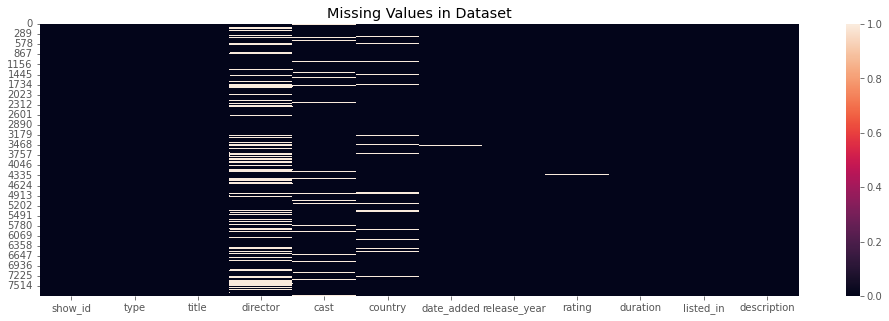

In [14]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('Missing Values in Dataset')

Inference- 

1. The attribute 'diector','cast','country','date_added','rating' consists of missing values.

**Handling Missing Value**

In [15]:
df[['director', 'country', 'cast', 'rating','date_added']].describe()

,director,country,cast,rating,date_added
count,5398,7280,7069,7780,7777
unique,4049,681,6831,14,1565
top,"Raúl Campos, Jan Suter",United States,David Attenborough,TV-MA,"January 1, 2020"
freq,18,2555,18,2863,118


**Inference-**
1. The attribute 'diector','cast','country','date_added','rating' consists of missing values.
2. To tackle with missing values , we will replace 'country' and 'rating' missing values by most frequent entity that is 'United States' and 'TV-MA' respectively.
3. missing values in 'cast' by 'unknown'.
4. There are around 30.68 % values are missing in 'director', hence we decide to drop it.

In [16]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)                  #replace null values by TV-MA
df['country'].replace(np.nan, 'United States',inplace  = True)         #replace null values by United States
df['cast'].replace(np.nan, 'unknown',inplace  = True)                  #replace null values by unknown
df= df.drop(columns='director',axis=1)                                 #drop director column

In [17]:
null_df= pd.DataFrame(df.isnull().sum())
null_df.reset_index(inplace=True)
null_df

,index,0
0,show_id,0
1,type,0
2,title,0
3,cast,0
4,country,0
5,date_added,10
6,release_year,0
7,rating,0
8,duration,0
9,listed_in,0


Text(0.5, 1.0, 'Removal of Missing Values in Dataset')

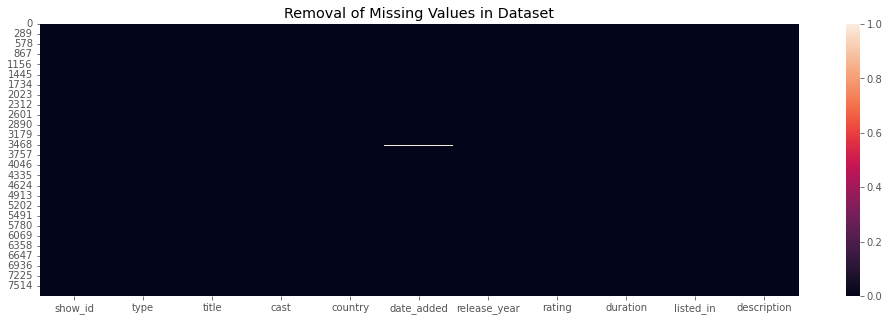

In [18]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('Removal of Missing Values in Dataset')

**checking duplicate values**

In [19]:
#  checking duplicate values 
df.duplicated().sum()

0

Inferences:

1. No duplicate values exist in whole dataset

# <font color='green'>**4. Data Cleaning**</font>

**Create new features based on date_added**

In [20]:
# Create new features to store date, day, month and year seperately.
df['date_added'] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] =df['date_added'].dt.year          # Compute year.
df['month_added'] =df['date_added'].dt.month        # Compute month.

In [21]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0


# <font color='green'>**5. Exploratory Data Analysis**</font>




**Lets check type of content on Netflix**

In [22]:
# create type of content df
df_type=pd.DataFrame(df['type'].value_counts())
df_type.reset_index(inplace=True)
df_type.rename(columns = {'index':'type', 'type':'count'}, inplace = True)
df_type

,type,count
0,Movie,5377
1,TV Show,2410


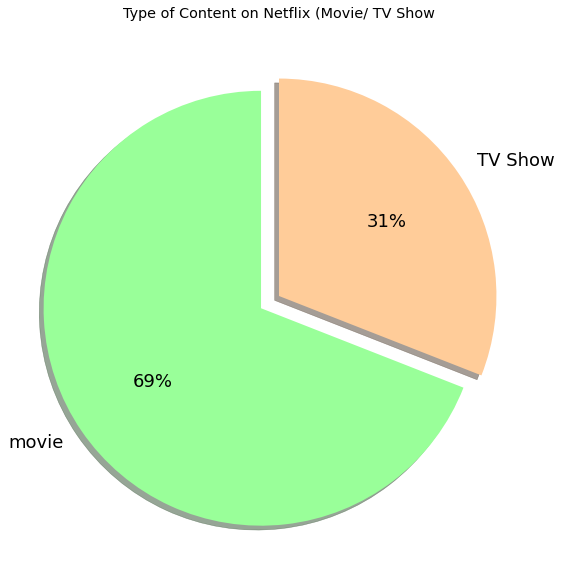

In [23]:
keys = ['movie','TV Show']
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
colors = ['#99ff99','#ffcc99']
# plotting data on chart
plt.pie(df_type['count'], labels=keys, autopct='%.0f%%', textprops={'fontsize': 18},colors=colors ,explode = (0.1, 0),shadow=True, startangle=90)
plt.title('Type of Content on Netflix (Movie/ TV Show')
# displaying chart
plt.show()

Inference:

1. 69% of the content available on Netflix are movies; the remaining 31% are TV Shows.
2. Netflix has 5377 movies, which is more than double the quantity of TV shows.


 **5.1 Has Netflix Been Focusing Increasingly on TV Shows as compared to movies**

**5.1.1 Distribution of Movie/Shows Release year**

Text(0.5, 6.800000000000029, 'Release Year')

<Figure size 1008x360 with 0 Axes>

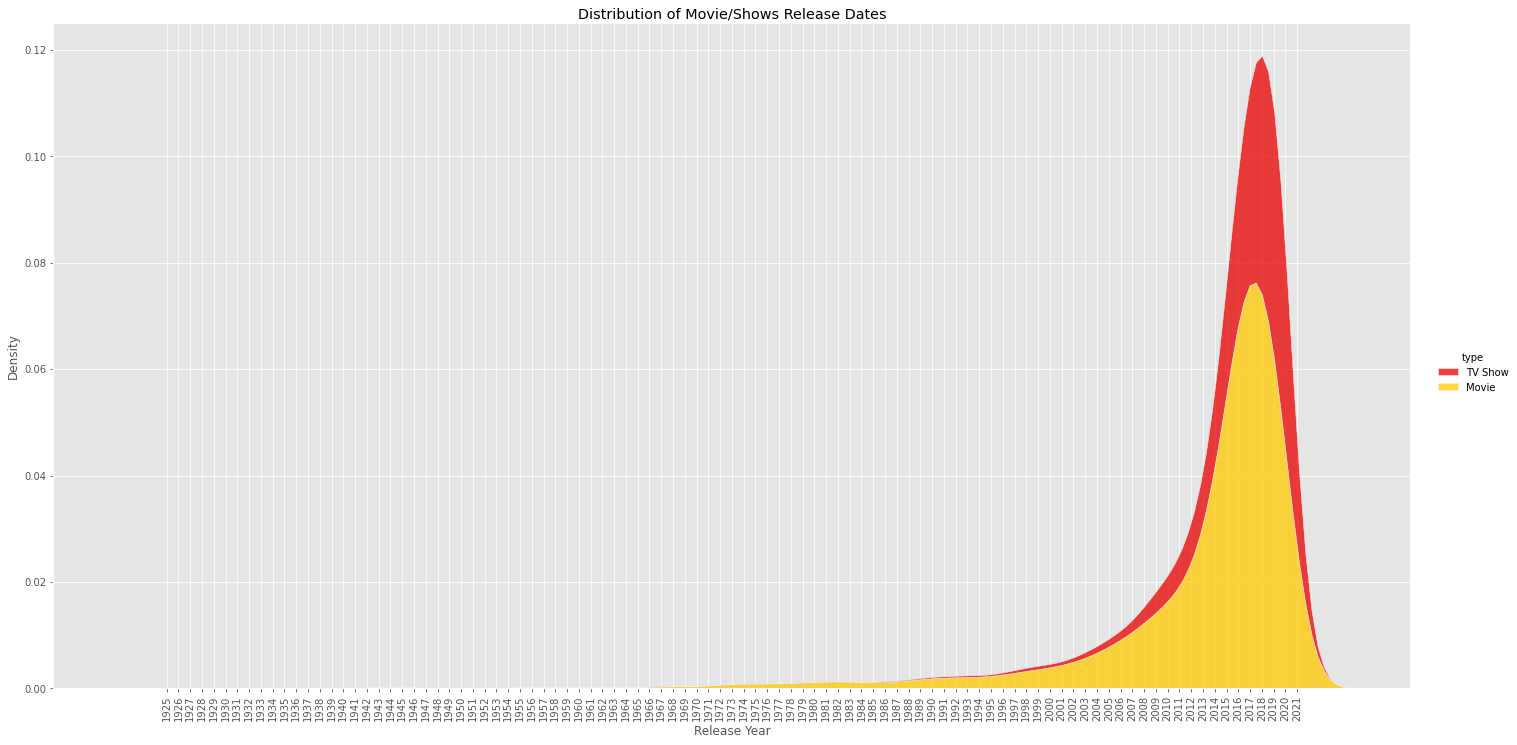

In [24]:
#Distribution of Movie/Shows Release year
plt.figure(figsize=(14,5))
sns.displot(x='release_year', hue = 'type', data = df, kind = 'kde', height=10, aspect=2, multiple='stack', palette='hot')
plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
plt.title('Distribution of Movie/Shows Release Dates')
plt.xlabel('Release Year')

**5.1.2. Distribution of Movie/Shows based on month added**

Text(0.5, 6.800000000000011, 'month_added')

<Figure size 1008x576 with 0 Axes>

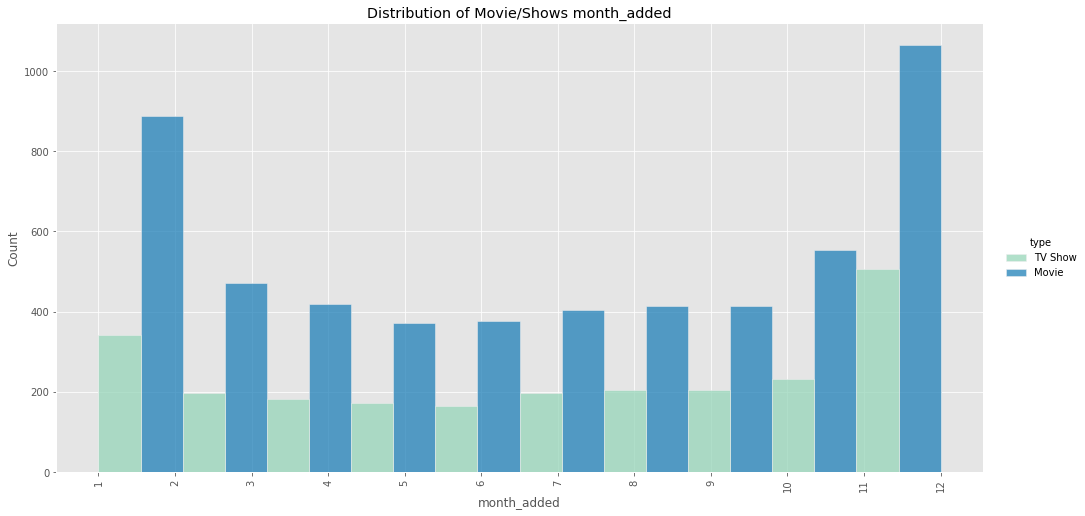

In [25]:
#Distribution of Movie/Shows based on month added
plt.figure(figsize=(14,8))
sns.displot(x='month_added', hue = 'type', data = df, kind = 'hist', height=7, aspect=2, multiple='dodge',bins=10, palette='YlGnBu')
plt.xticks(ticks= np.arange(df.month_added.min(),df.month_added.max()+1,1), rotation = 90)
plt.title('Distribution of Movie/Shows month_added')
plt.xlabel('month_added')

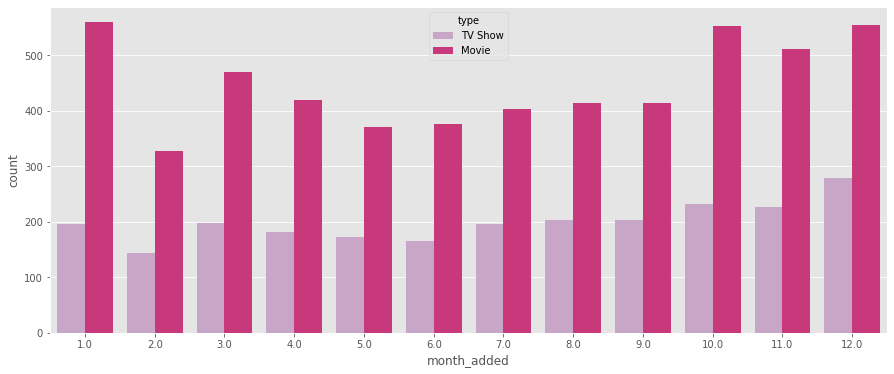

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=df, ax=ax, palette='PuRd')

**5.1.3 Distribution of Movie/Shows based on date added**

Text(0.5, 6.800000000000011, 'date_added')

<Figure size 1008x576 with 0 Axes>

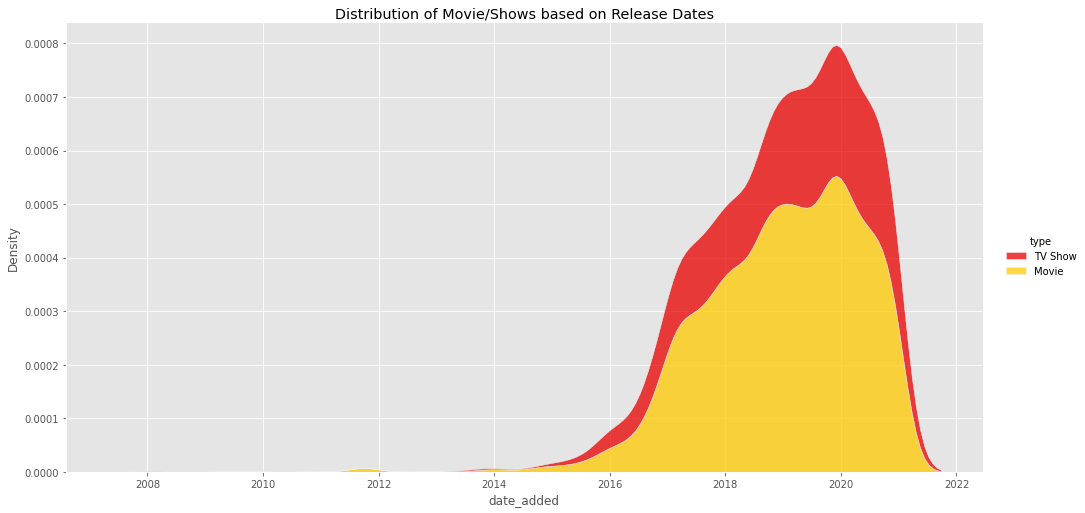

In [27]:
#Distribution of Movie/Shows based on date added
plt.figure(figsize=(14,8))
sns.displot(x='date_added', hue = 'type', data = df, kind = 'kde', height=7, aspect=2, multiple='stack', palette='hot')

plt.title('Distribution of Movie/Shows based on Release Dates')
plt.xlabel('date_added')

**5.1.4 Distribution of Movie/Shows based on day added**

Text(0.5, 6.800000000000011, 'day_added')

<Figure size 1008x576 with 0 Axes>

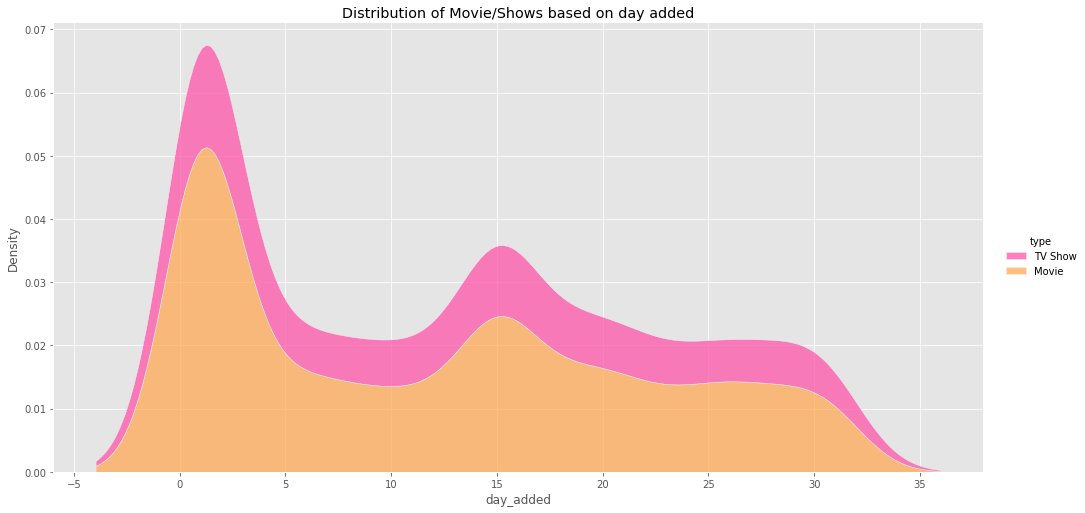

In [28]:
#Distribution of Movie/Shows based on day added
plt.figure(figsize=(14,8))
sns.displot(x='day_added', hue = 'type', data = df, kind = 'kde', height=7, aspect=2, multiple='stack', palette='spring')

plt.title('Distribution of Movie/Shows based on day added')
plt.xlabel('day_added')

**5.2 Analysing how many movies released per year in last 15 years**

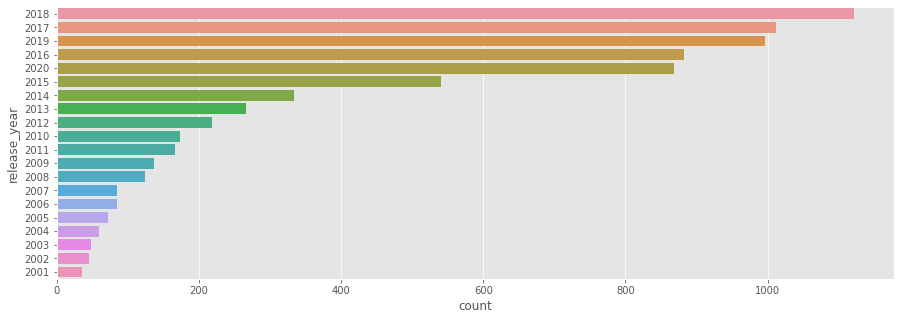

In [29]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=df['release_year'],data=df,order=df['release_year'].value_counts().index[0:20])

**5.3 Top 10 Countries that produced content on Netflix**

In [30]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [31]:
a=df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

top_country = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})



In [32]:
top_country=pd.DataFrame(df['country'].value_counts())
top_country.reset_index(inplace=True)
top_country.rename(columns = {'index':'country', 'country':'count'}, inplace = True)
top_country

,country,count
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


Text(0.5, 1.0, 'Top 20 Country active on Netflix')

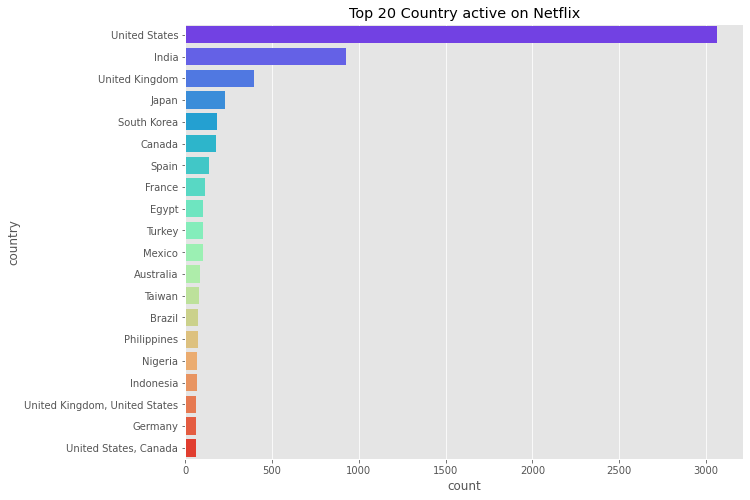

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(data= top_country[:20], x='count', y='country', palette='rainbow')
plt.title('Top 20 Country active on Netflix')

**5.4 What kind of content is available in different countries in recent years?**

Since there are many countries, we will take the top ten countries that produce content and see what type of content these countries provide the most?

In [34]:
country_order = df['country'].value_counts()[:10].index
content_country= df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order].reset_index()
content_country

type,index,Movie,TV Show
0,United States,2080.0,982.0
1,India,852.0,71.0
2,United Kingdom,193.0,204.0
3,Japan,69.0,157.0
4,South Korea,36.0,147.0
5,Canada,118.0,59.0
6,Spain,89.0,45.0
7,France,69.0,46.0
8,Egypt,89.0,12.0
9,Turkey,73.0,27.0


Text(0.5, 1.0, 'Top 10 countries and type of content ')

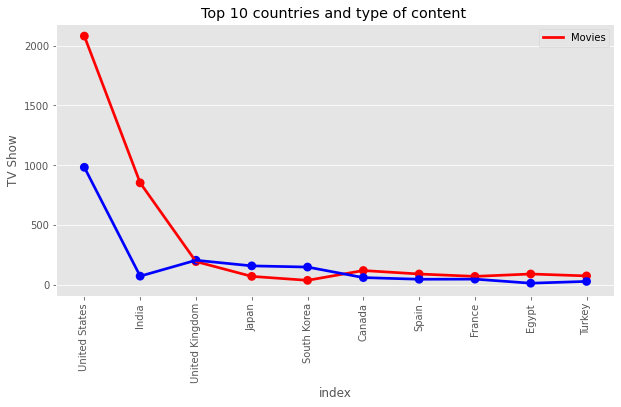

In [35]:
plt.figure(figsize=(10,5))
sns.pointplot(data=content_country, x='index', y='Movie', color='red', errorbar="sd")
sns.pointplot(data=content_country, x='index', y='TV Show', color='blue', errorbar="sd")
plt.xticks(rotation=90)
plt.legend(labels=['Movies'])
plt.title('Top 10 countries and type of content ')


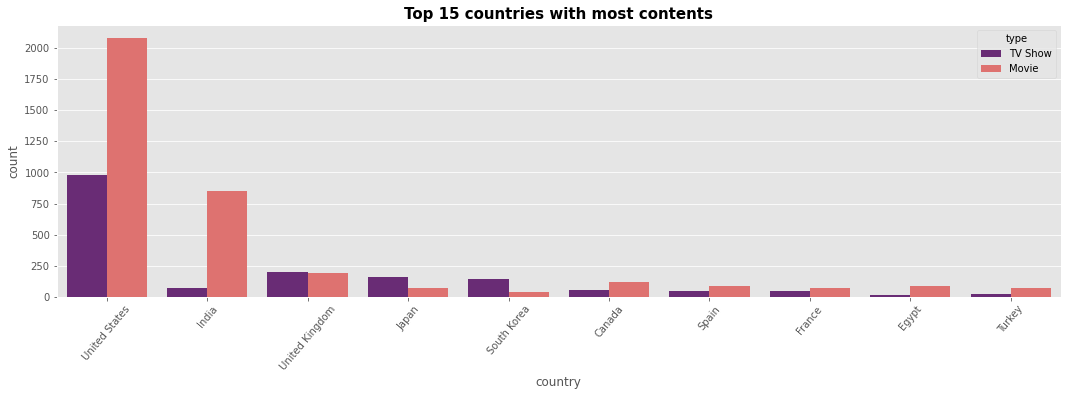

In [36]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],palette="magma",order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**Rating**

**5.5 Assigning the Ratings into grouped categories**

In [37]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [38]:
# type should be a catego
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [39]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

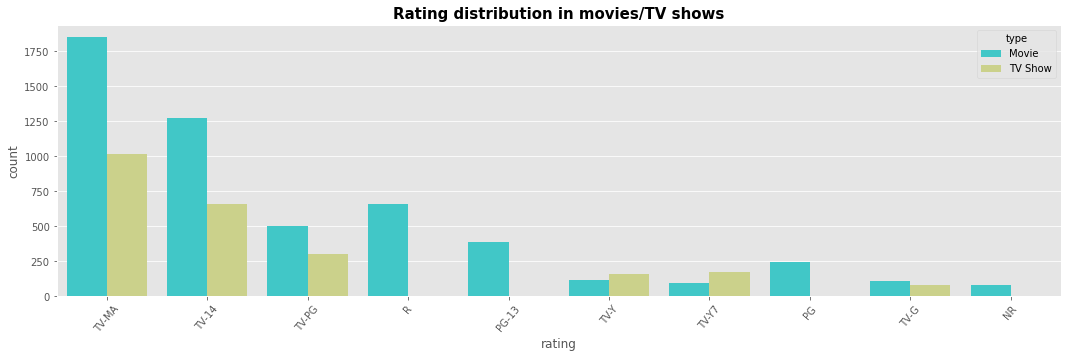

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['rating'],palette="rainbow",order=df['rating'].value_counts().index[0:10],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Rating distribution in movies/TV shows', fontsize=15, fontweight='bold')
plt.show()

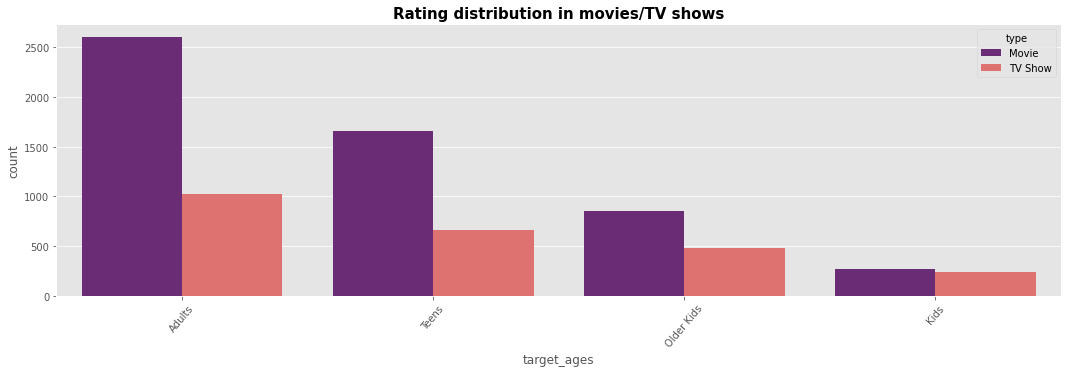

In [41]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['target_ages'],palette="magma",order=df['target_ages'].value_counts().index[0:10],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Rating distribution in movies/TV shows', fontsize=15, fontweight='bold')
plt.show()

**5.6 Popular Tv shows Ratings**

In [42]:
#Pointplot on top tv show ratings 
tv_ratings =tv_shows.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
tv_ratings 

,rating,count
4,TV-MA,1020
2,TV-14,659
5,TV-PG,301
7,TV-Y7,176
6,TV-Y,163
3,TV-G,83
0,NR,5
1,R,2
8,TV-Y7-FV,1


Text(0.5, 1.0, 'Popular TV shows rating')

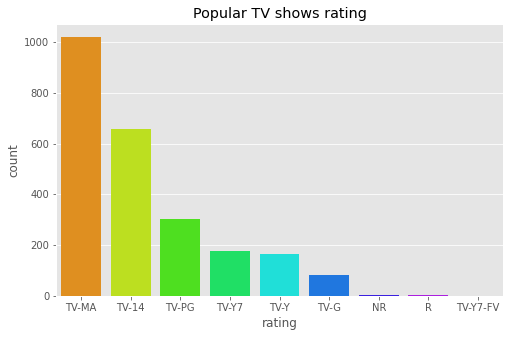

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=tv_ratings, x='rating', y='count', palette='hsv')
plt.title('Popular TV shows rating')

In [44]:
tv_shows[tv_shows['rating']=='TV-MA'][:5]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults
5,s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1.0,2017.0,7.0,Adults
11,s12,TV Show,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",30.0,2018.0,11.0,Adults
12,s13,TV Show,1994,unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,17.0,2019.0,5.0,Adults
26,s27,TV Show,(Un)Well,unknown,United States,2020-08-12,2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,12.0,2020.0,8.0,Adults


**5.7 Popular Movies Ratings**

In [45]:
#Pointplot on top movies ratings 
movies_ratings =movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
movies_ratings 

,rating,count
8,TV-MA,1850
6,TV-14,1272
5,R,663
9,TV-PG,505
4,PG-13,386
3,PG,247
10,TV-Y,117
7,TV-G,111
11,TV-Y7,95
2,NR,79


Text(0.5, 1.0, 'Popular TV shows rating')

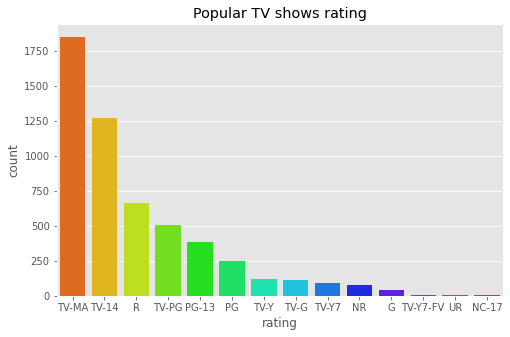

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=movies_ratings, x='rating', y='count',palette='hsv')
plt.title('Popular TV shows rating')

**5.8 Top 10 Genre in movies**

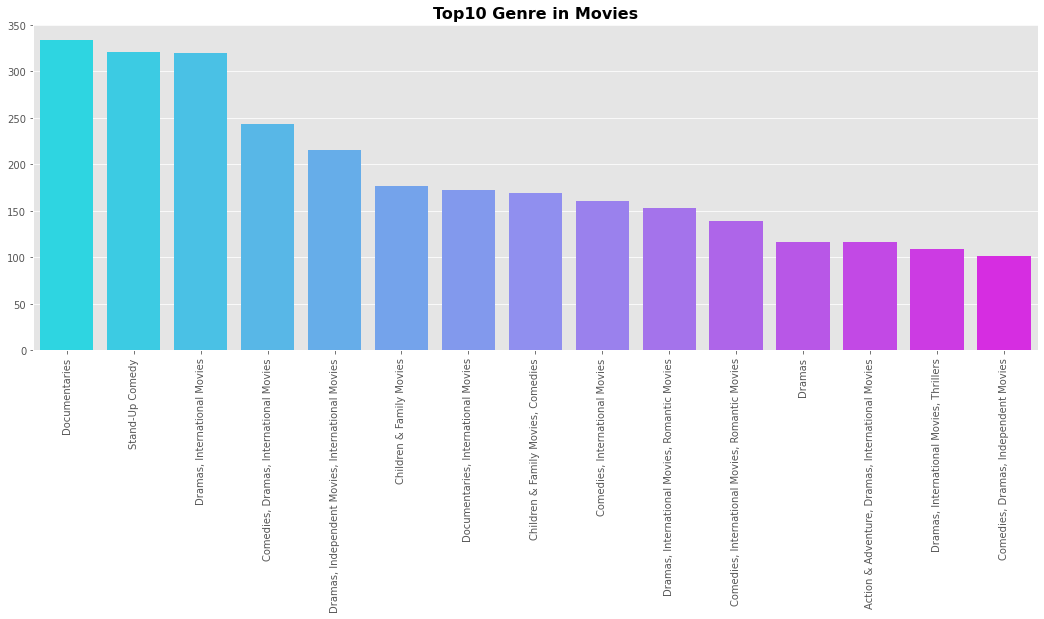

In [47]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = movies["listed_in"].value_counts().head(15).index,y = movies["listed_in"].value_counts().head(15).values,palette="cool")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

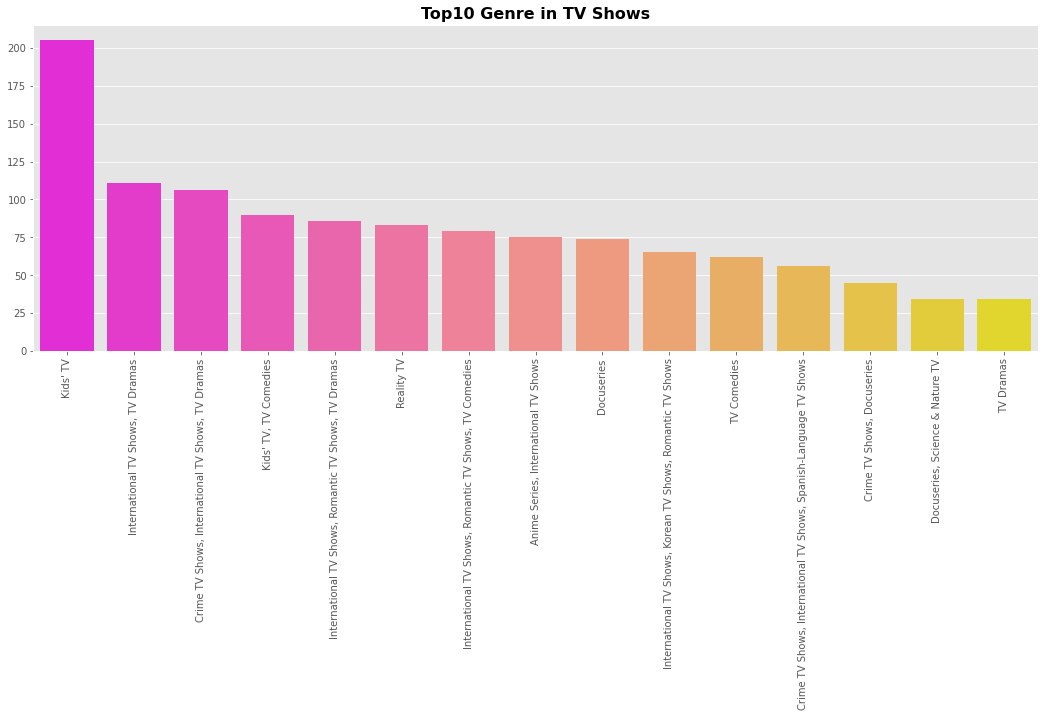

In [48]:
# Top 10 Genre in TV Shows
plt.figure(figsize=(18,6))
sns.barplot(x = tv_shows["listed_in"].value_counts().head(15).index,y = tv_shows["listed_in"].value_counts().head(15).values,palette="spring")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",size='16',fontweight="bold")
plt.show()

**5.9 Top 20 actors netflix**

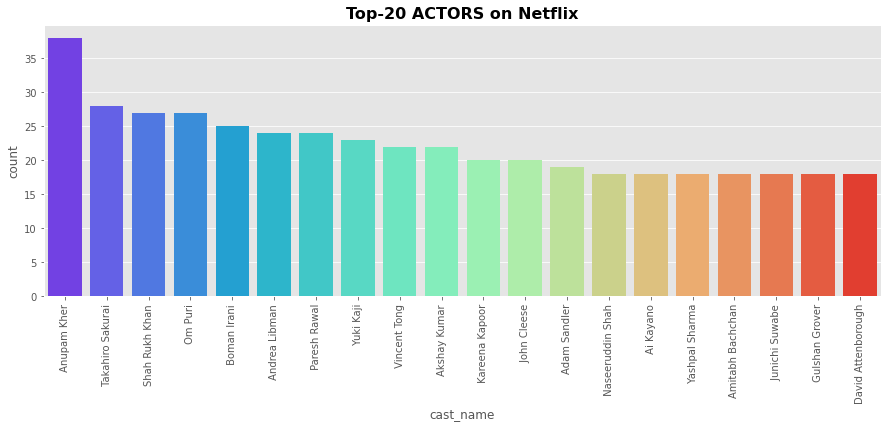

In [49]:
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="rainbow")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

**5.10 Distribution of Duration of Movies**

In [50]:
df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)
df['duration']


0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64

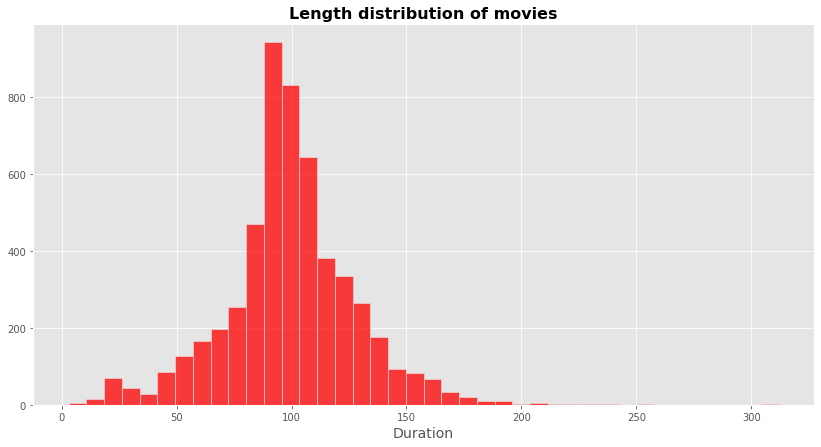

In [51]:
# Length distribution of movies
movies = df[df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.histplot(movies['duration'], bins=40,color='r').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**5.11 Count of Number of seasons of TV Shows**

In [52]:
no_of_seasons= tv_shows['duration'].value_counts()
no_of_seasons=pd.DataFrame(no_of_seasons)
no_of_seasons.reset_index(inplace=True)
no_of_seasons.rename(columns = {'index':'season', 'duration':'count'}, inplace = True)
no_of_seasons

,season,count
0,1 Season,1608
1,2 Seasons,382
2,3 Seasons,184
3,4 Seasons,87
4,5 Seasons,58
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,6


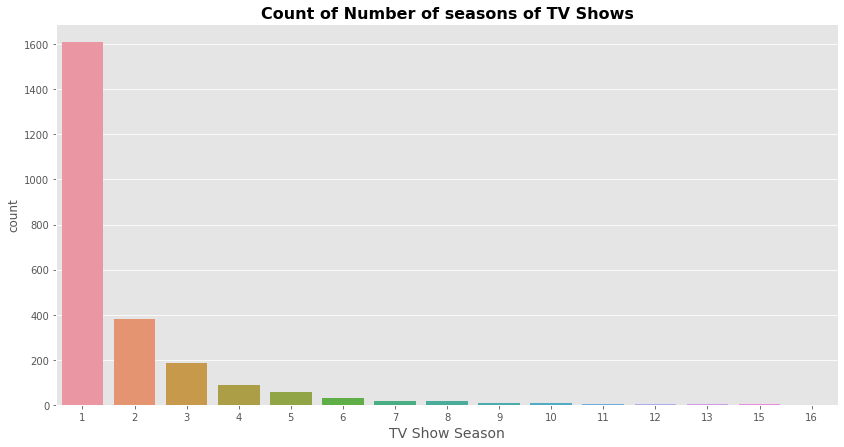

In [53]:
# Count of Number of seasons of TV Shows
tv_shows=df[df['type']=='TV Show']

plt.figure(figsize=(14, 7))

sns.countplot(tv_shows['duration'])

plt.title('Count of Number of seasons of TV Shows', fontsize=16,fontweight="bold")
plt.xlabel('TV Show Season', fontsize=14)
plt.show()

**5.12 Longest TV Shows based on Number of Seasons**

In [54]:
#Longest TV Shows based on Number of Seasons
long_shows = tv_shows[tv_shows['duration']>5]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
5137,Red vs. Blue,13
...,...,...
4980,Private Practice,6
4985,Project Mc²,6
1470,Comedians in Cars Getting Coffee,6
5344,Saint Seiya,6



**5.13 Understanding Content Produced in Different Countries**

In [55]:
new_df=df.copy()

In [56]:
replacing_genre = {'International TV Shows': '-','TV Dramas': 'Drama', 'TV Sci-Fi & Fantasy': 'SciFiFantasy', 'Dramas': 'Drama' ,
                   'International Movies': '-','Horror Movies': 'Horror','Action & Adventure': 'ActionAdventure','Independent Movies': '-','Sci-Fi & Fantasy': 'SciFiFantasy',
                   'TV Mysteries': 'Mystery','Thrillers': 'Thriller','Crime TV Shows': 'Crime','Docuseries': 'Documentary',
                   'Documentaries': 'Documentary', 'Sports Movies': 'Sports','Comedies':'Comedy','Anime Series': 'Anime','Reality TV': 'Reality',
                   'TV Comedies': 'Comedy','Romantic Movies': 'Romance','Romantic TV Shows': 'Romance', 'Science & Nature TV': 'Science',
                   'Movies': '-','British TV Shows': '-','Korean TV Shows': '-','Music & Musicals': 'Music','LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', "Kids' TV": 'Kids','TV Action & Adventure': 'ActionAdventure','Spanish-Language TV Shows': '-',
                   'Children & Family Movies': 'Family', 'TV Shows': '-','Classic Movies': 'Classic','Cult Movies': 'Cult',
                   'TV Horror': 'Horror','Stand-Up Comedy & Talk Shows':'Comedy, TalkShow','Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime','TV Thrillers': 'Thriller','Classic & Cult TV':'Classic, Cult'}

In [70]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      
       new_text.append(replacing_genre[word])
    

  return(', '.join(new_text))
  

In [71]:
new_df['Genres'] = new_df.apply(lambda row: genre_replace(row),axis=1)
new_df['Genres'] = new_df['listed_in'].apply(lambda row: row.split(', '))
new_df['Genres']

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7782                       [Dramas, International Movies]
7783     [Dramas, International Movies, Music & Musicals]
7784    [Documentaries, International Movies, Music & ...
7785                 [International TV Shows, Reality TV]
7786                    [Documentaries, Music & Musicals]
Name: Genres, Length: 7787, dtype: object

In [72]:
top_country['Genres'] = new_df['listed_in'].apply(lambda row: row.split(', '))

In [73]:
#function to convert string type to list 
def operation(row,string):
  return row[string].split(', ')
top_country['listed_in'] =new_df.apply(lambda x: operation(x,'listed_in'), axis = 1)


In [74]:
#explodes the list of categories and genres in each row to individual rows
top_country = top_country.explode('Genres').explode('Genres')

In [75]:
df1=top_country.sort_values(by='count',ascending= False)
df1

,country,count,Genres,listed_in
0,United States,3062,International TV Shows,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
0,United States,3062,TV Sci-Fi & Fantasy,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
0,United States,3062,International TV Shows,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
0,United States,3062,TV Dramas,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
0,United States,3062,TV Sci-Fi & Fantasy,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
...,...,...,...,...
345,"Czech Republic, Slovakia",1,International Movies,"[Horror Movies, International Movies]"
346,"United Kingdom, Germany, United States, France",1,Dramas,"[Dramas, International Movies, Romantic Movies]"
346,"United Kingdom, Germany, United States, France",1,International Movies,"[Dramas, International Movies, Romantic Movies]"
346,"United Kingdom, Germany, United States, France",1,Romantic Movies,"[Dramas, International Movies, Romantic Movies]"


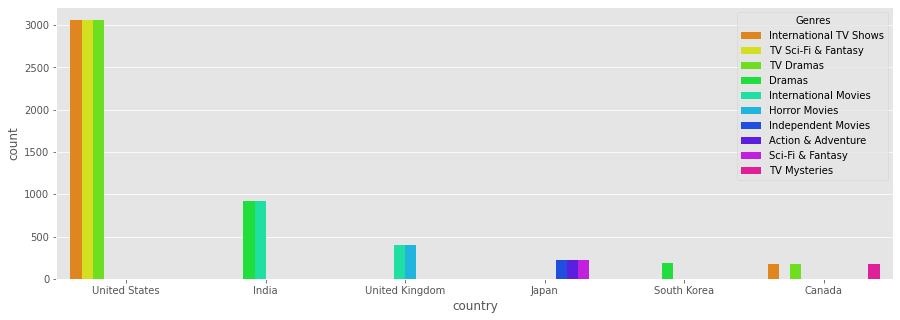

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1[:30], x='country', y='count', hue='Genres', palette='hsv')

**5.14 Country wise Content Production in Heatmap**

In [77]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008850,0.02,0.027322,0.022388,0.093199,0.089484
Older Kids,0.225989,0.039604,0.060870,0.160347,0.269912,0.07,0.120219,0.044776,0.204030,0.195297
Teens,0.146893,0.683168,0.165217,0.567714,0.353982,0.14,0.382514,0.097015,0.188917,0.242978
Adults,0.446328,0.277228,0.678261,0.255688,0.367257,0.77,0.469945,0.835821,0.513854,0.472240


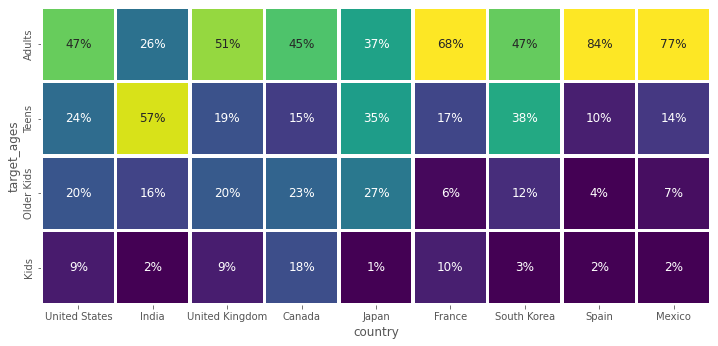

In [78]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="viridis",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

# <font color='green'>**6. Text Processing**</font>

We will be using text columns to create clusters for our data.

In [92]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [94]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [96]:
df['new_description'] = df['description'].apply(transform_text)
df['Genres']= df['listed_in'].apply(transform_text)

In [97]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['new_description'].apply(lambda x: [item for item in x if item not in stop])
# remove short words
df['new_description'] = df['new_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df['Genres']= df['listed_in'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [98]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,cast_name,count,new_description,Genres
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,"[João Miguel, Bianca Comparato, Michel Gomes...",1,futur elit inhabit island paradis far crowd sl...,"International Shows, Dramas, Sci-Fi Fantasy"
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",1,devast earthquak hit mexico citi trap survivor...,"Dramas, International Movies"
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",1,armi recruit found dead fellow soldier forc co...,"Horror Movies, International Movies"
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,"[Elijah Wood, John C. Reilly, Jennifer Conne...",1,postapocalypt world robot hide fear danger mac...,"Action Adventure, Independent Movies, Sci-Fi F..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",1,brilliant group student becom expert intent sw...,Dramas


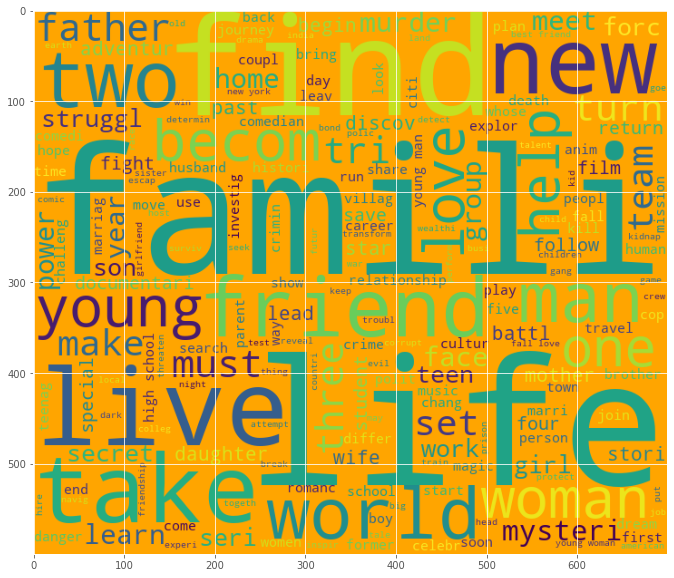

In [111]:
#loading wordCloud
from wordcloud import WordCloud
wc = WordCloud(width=700,height=600,min_font_size=10,background_color='orange')
new=wc.generate(df['new_description'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(new)

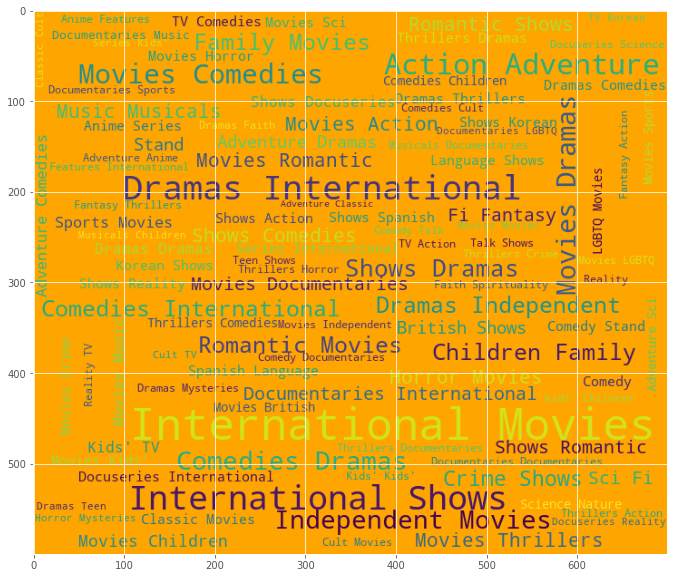

In [112]:
genres=wc.generate(df['Genres'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(new)

# <font color='green'>**7. Model Selection**</font>

In [113]:

# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7787, 5000)

In [115]:
# convert X into array form for clustering
X = X_tfidf.toarray()

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()